# TEST Adamoptimizer

# Import data set

In [2]:
pip install sklearn

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 

In [6]:
from sklearn.datasets import fetch_california_housing
california=fetch_california_housing()
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

# plot EDA

In [8]:
df=pd.DataFrame(california.data, columns=california.feature_names)
df["TARGET"]=california.target
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


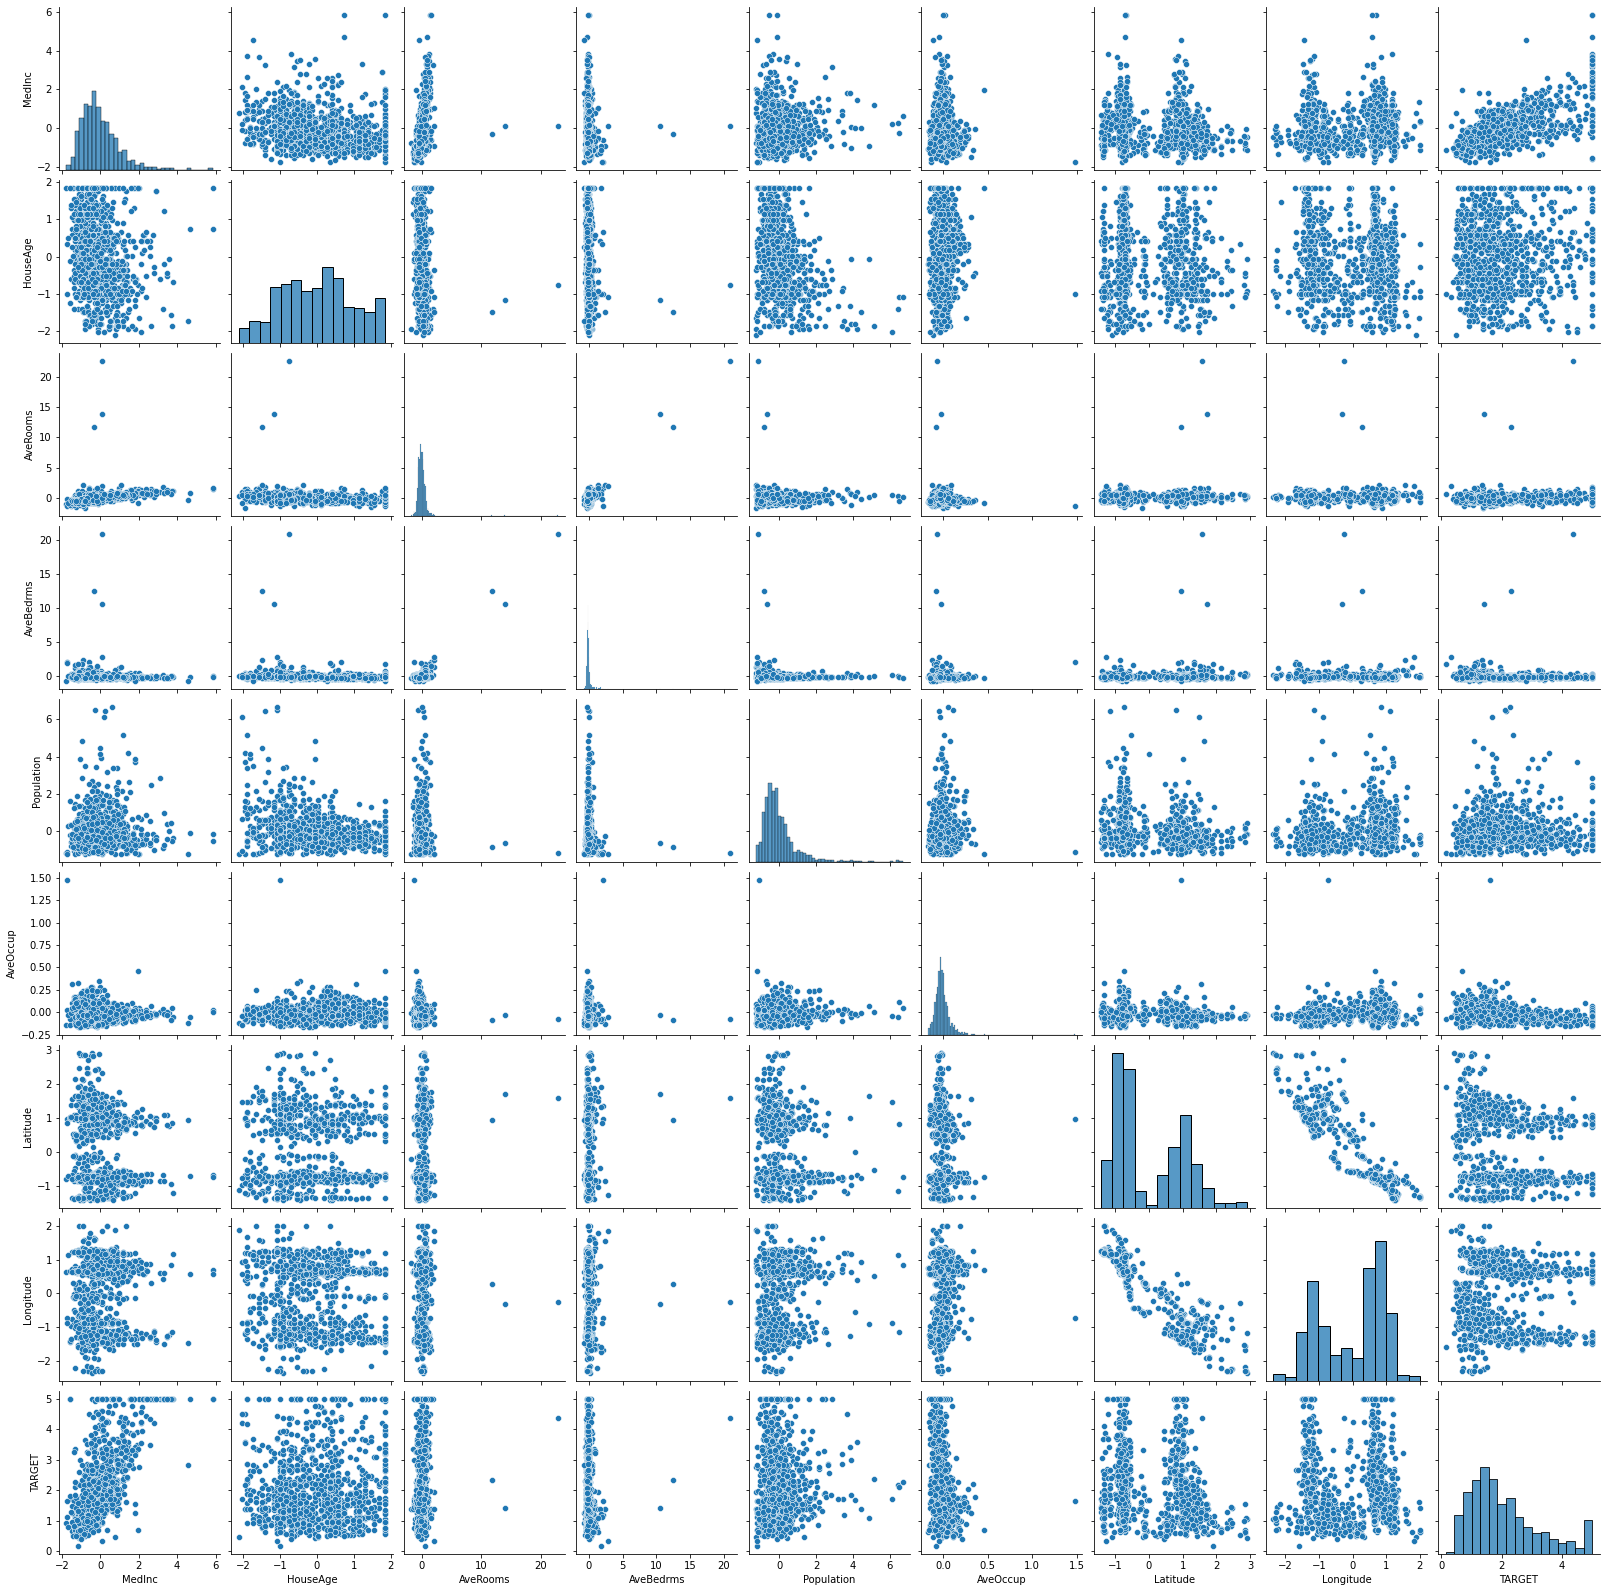

In [9]:
scaler=StandardScaler()

df.values[:,:-1]=scaler.fit_transform(df.values[:,:-1])
sns.pairplot(df.sample(1000))
plt.show()

# Build Train module

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [18]:
data=torch.from_numpy(df.values).float()
data.shape

torch.Size([20640, 9])

In [19]:
x=data[:,:-1]
y=data[:,-1:]
print(x.shape, y.shape)

torch.Size([20640, 8]) torch.Size([20640, 1])


# Build nn.Module forward propagation

In [24]:
class REG(nn.Module) :
    def __init__(self,input_dim, output_dim):
        self.input_dim=input_dim
        self.output_dim=output_dim
        super().__init__()
        
        #design 5th depth DNN.input_dim > 6>5>4>3>output_dim
        self.Linear1=nn.Linear(self.input_dim,6) 
        self.Linear2=nn.Linear(6,5)
        self.Linear3=nn.Linear(5,4)
        self.Linear4=nn.Linear(4,3)
        self.Linear5=nn.Linear(3,self.output_dim)
        self.act=nn.LeakyReLU(0.1)
    
    #design 5th depts Forward propagation    
    def forward(self,x) : 
        h=self.act(self.Linear1(x))
        h=self.act(self.Linear2(h))
        h=self.act(self.Linear3(h))
        h=self.act(self.Linear4(h))
        y=self.Linear5(h)
        return y
model=REG(x.size(-1),y.size(-1))
model

REG(
  (Linear1): Linear(in_features=8, out_features=6, bias=True)
  (Linear2): Linear(in_features=6, out_features=5, bias=True)
  (Linear3): Linear(in_features=5, out_features=4, bias=True)
  (Linear4): Linear(in_features=4, out_features=3, bias=True)
  (Linear5): Linear(in_features=3, out_features=1, bias=True)
  (act): LeakyReLU(negative_slope=0.1)
)

# Build Regression and backward propagation

In [34]:
n_eporch=4000
learning_rate=1e-2
print_interval=200
batch_size=256

In [27]:
optimizer=optim.Adam(model.parameters(), lr=learning_rate)

In [35]:
for i in range(n_eporch):
     #Random shuffle the indext
    indices = torch.randperm(x.size(0))
    x_=torch.index_select(x,dim=0,index=indices)
    y_=torch.index_select(y,dim=0,index=indices)
    
    #split into the batch size
    x_=x_.split(batch_size,dim=0)
    y_=y_.split(batch_size, dim=0)
    
    y_hat=[]
    total_loss=0
    for x_i,y_i in zip(x_,y_) :
        y_hat_i=model(x_i)
        loss=F.mse_loss(y_hat_i,y_i)
    
        optimizer.zero_grad()
    
        loss.backward()
    
        optimizer.step()
        total_loss+=float(loss)
        y_hat+=[y_hat_i]
    total_loss=total_loss/len(x_)
    if(i+1) % print_interval ==0 :
        print("Epochs : %d    Loss : %.4e" %(i+1,total_loss))

y=torch.cat(y_,dim=0)
y_hat=torch.cat(y_hat,dim=0)

Epochs : 200    Loss : 2.8842e-01
Epochs : 400    Loss : 2.8749e-01
Epochs : 600    Loss : 2.8507e-01
Epochs : 800    Loss : 2.7841e-01
Epochs : 1000    Loss : 2.7446e-01
Epochs : 1200    Loss : 2.7172e-01
Epochs : 1400    Loss : 2.8337e-01
Epochs : 1600    Loss : 2.6976e-01
Epochs : 1800    Loss : 2.6893e-01
Epochs : 2000    Loss : 2.7420e-01
Epochs : 2200    Loss : 2.7268e-01
Epochs : 2400    Loss : 2.7329e-01
Epochs : 2600    Loss : 2.8081e-01
Epochs : 2800    Loss : 2.7242e-01
Epochs : 3000    Loss : 2.6942e-01
Epochs : 3200    Loss : 2.7258e-01
Epochs : 3400    Loss : 2.6705e-01
Epochs : 3600    Loss : 2.6839e-01
Epochs : 3800    Loss : 2.6553e-01
Epochs : 4000    Loss : 2.7044e-01


# Result Plotting

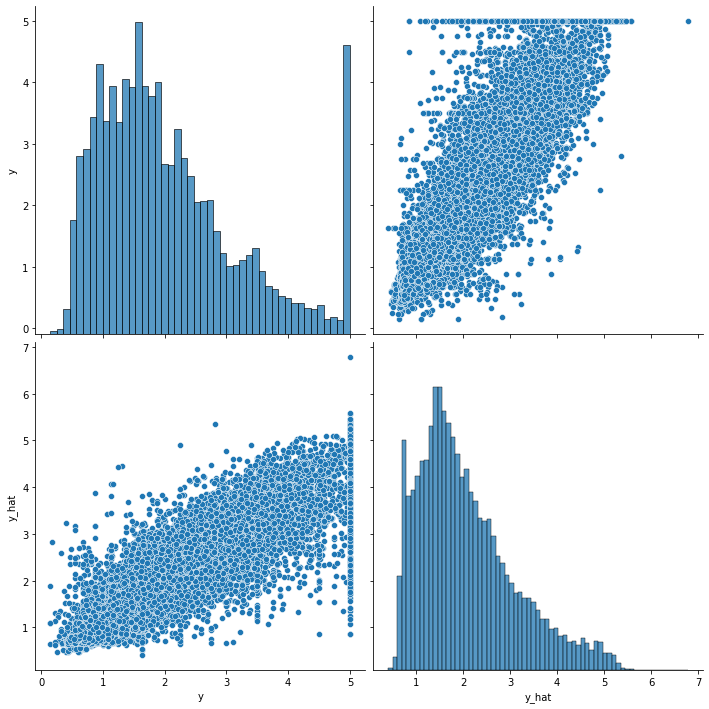

In [32]:
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach().numpy(),
                  columns=["y", "y_hat"])

sns.pairplot(df, height=5)
plt.show()
